In [3]:
#importing libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
df=pd.read_excel('D:\\dsa\\satisfaction.xlsx')
df.head()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [5]:
df.shape

(129880, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   satisfaction_v2                    129880 non-null  object 
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Seat comfort                       129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Gate location                      1298

In [7]:
#preprocessing

In [9]:
df.isna().sum()

id                                     0
satisfaction_v2                        0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [10]:
df['Arrival Delay in Minutes'].mode()[0]

0.0

In [11]:
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mode()[0],inplace=True)

In [12]:
df.isna().sum()

id                                   0
satisfaction_v2                      0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [13]:
#Dealing with outliers

<AxesSubplot:>

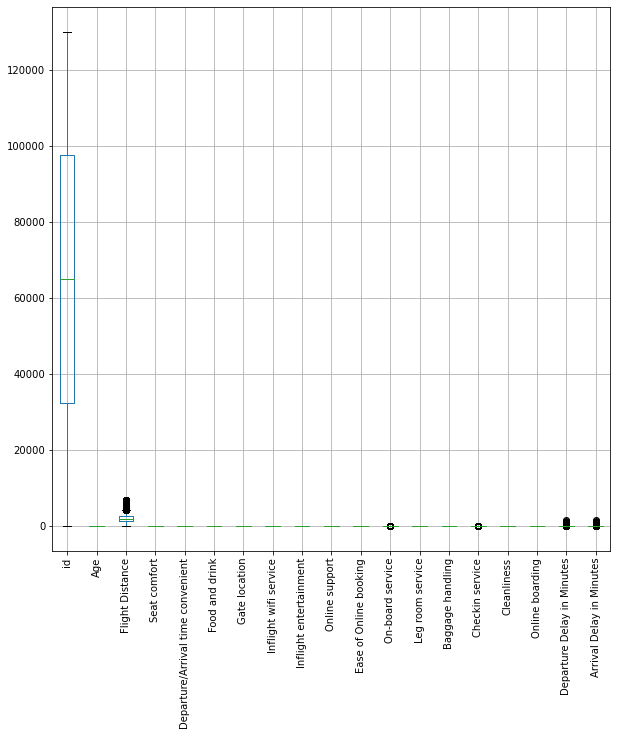

In [14]:
plt.figure(figsize=(10,10))
df.boxplot(rot=90)

In [17]:
# Outliers are in .Flight Distance .Departure Delay in Minutes .Arrival Delay in Minutes

In [18]:
def outliers(x):
    q1=np.percentile(x,25)
    q3=np.percentile(x,75)
    iqr=q3-q1
    floor=q1-1.5*iqr
    ceiling=q3+1.5*iqr
    return floor,ceiling

In [19]:
up_bound,l_bound=outliers(df['Departure Delay in Minutes'])
print('Outliers lowerbound=',l_bound)
print('Outliers uppernound=',up_bound)

Outliers lowerbound= 30.0
Outliers uppernound= -18.0


In [20]:
med=np.median(df['Departure Delay in Minutes'])
for i in df['Departure Delay in Minutes']:
    if ((i>up_bound) or (i<l_bound)):
        df['Departure Delay in Minutes']=df['Departure Delay in Minutes'].replace(i,med)

In [21]:
up_bound,l_bound=outliers(df['Arrival Delay in Minutes'])
print('Outliers lowerbound=',l_bound)
print('Outliers uppernound=',up_bound)

Outliers lowerbound= 32.5
Outliers uppernound= -19.5


In [22]:
med=np.median(df['Arrival Delay in Minutes'])
for i in df['Arrival Delay in Minutes']:
    if ((i>up_bound) or (i<l_bound)):
        df['Arrival Delay in Minutes']=df['Arrival Delay in Minutes'].replace(i,med)

<AxesSubplot:>

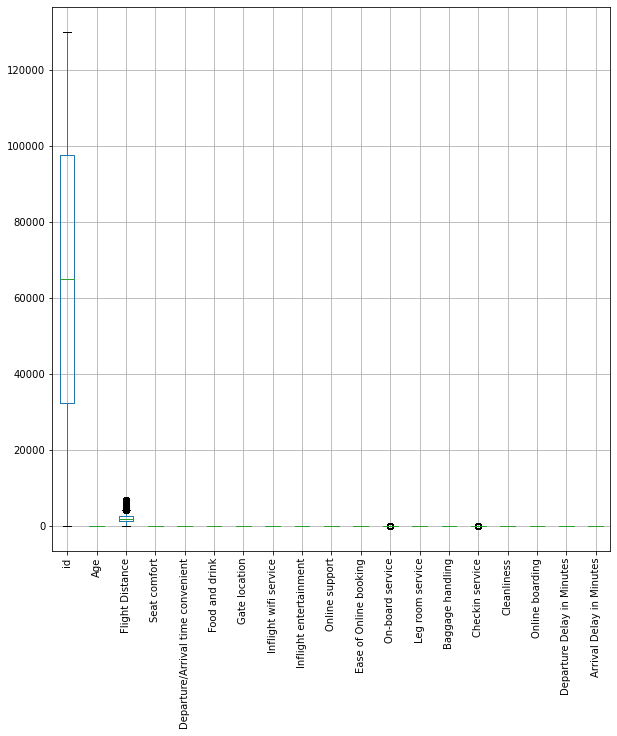

In [23]:
plt.figure(figsize=(10,10))
df.boxplot(rot=90)

In [24]:
#encoding

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   satisfaction_v2                    129880 non-null  object 
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Seat comfort                       129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Gate location                      1298

In [26]:
df['satisfaction_v2'].value_counts()

satisfied                  71087
neutral or dissatisfied    58793
Name: satisfaction_v2, dtype: int64

In [27]:
cat_data=['satisfaction_v2','Gender','Customer Type','Type of Travel','Class']


In [28]:
for i in cat_data:
    print(df[i].value_counts())

satisfied                  71087
neutral or dissatisfied    58793
Name: satisfaction_v2, dtype: int64
Female    65899
Male      63981
Name: Gender, dtype: int64
Loyal Customer       106100
disloyal Customer     23780
Name: Customer Type, dtype: int64
Business travel    89693
Personal Travel    40187
Name: Type of Travel, dtype: int64
Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64


In [29]:
#label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
label_encoder={}

for i in cat_data:
    label_encoder[i] = LabelEncoder()
    df[i] = label_encoder[i].fit_transform(df[i]) 

In [30]:
df.head(10)


,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,1,0,0,65,1,1,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,1,1,0,47,1,0,2464,0,0,...,2,3,4,4,4,2,3,2,0,0.0
2,103199,1,0,0,15,1,1,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,1,0,0,60,1,1,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,1,0,0,70,1,1,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0
5,100744,1,1,0,30,1,1,1894,0,0,...,2,2,5,4,5,5,4,2,0,0.0
6,32838,1,0,0,66,1,1,227,0,0,...,5,5,5,0,5,5,5,3,0,0.0
7,32864,1,1,0,10,1,1,1812,0,0,...,2,2,3,3,4,5,4,2,0,0.0
8,53786,1,0,0,56,1,0,73,0,0,...,5,4,4,0,1,5,4,4,0,0.0
9,7243,1,1,0,22,1,1,1556,0,0,...,2,2,2,4,5,3,4,2,0,0.0


In [31]:
#Feature Reduction

In [32]:
df.columns

Index(['id', 'satisfaction_v2', 'Gender', 'Customer Type', 'Age',
       'Type of Travel', 'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

<AxesSubplot:>

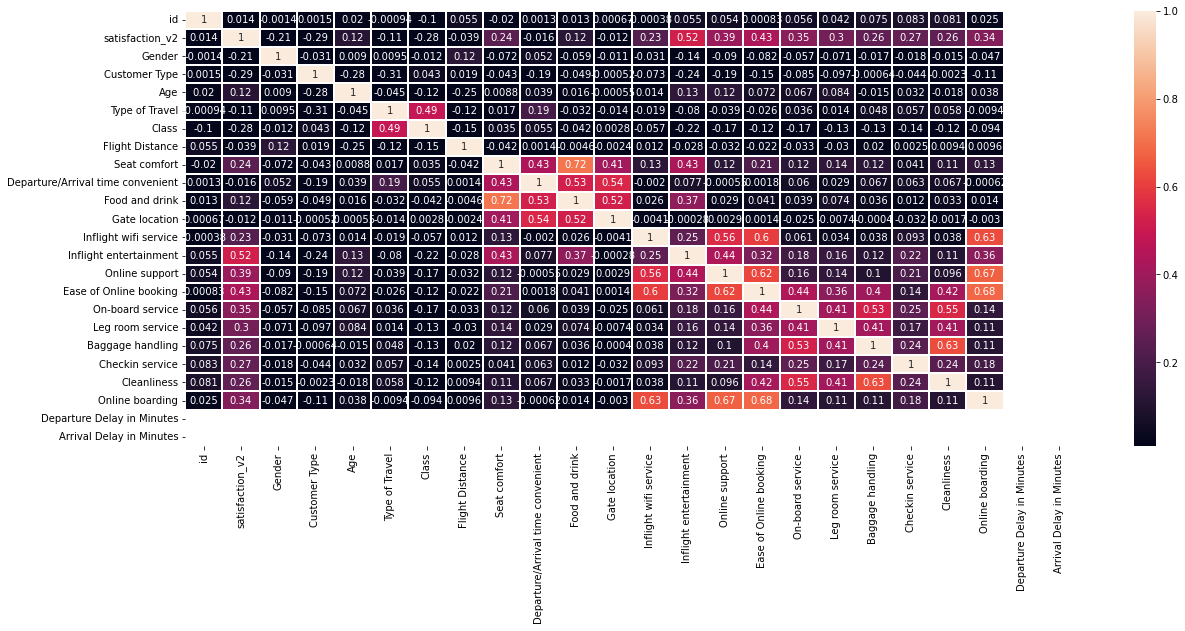

In [48]:
corrmatrix=df.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=0.01,vmax=1,annot=True,linewidth=0.2)

In [49]:
x=df.drop(['id','Arrival Delay in Minutes','satisfaction_v2'],axis=1)

In [50]:
y=df['satisfaction_v2']

In [51]:
x.shape


(129880, 21)

In [52]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scaled_data=scale.fit_transform(x)
pd.DataFrame(scaled_data)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-0.985340,-0.473422,1.691351,1.493951,0.653608,-1.671103,-2.037791,-1.958230,-1.975443,-0.758383,...,0.458022,-1.163181,-0.361613,-0.365962,-2.697605,-0.601544,1.316217,-0.612761,-1.041485,0.0
1,1.014878,-0.473422,0.500820,1.493951,-0.955724,0.469852,-2.037791,-1.958230,-1.975443,0.007334,...,-1.027802,-1.163181,-0.361613,0.420925,0.397840,0.263150,-1.063645,-0.612761,-1.041485,0.0
2,-0.985340,-0.473422,-1.615680,1.493951,0.653608,0.152458,-2.037791,-1.958230,-1.975443,0.007334,...,-2.513627,-1.163181,-1.127571,-0.365962,-0.376021,0.263150,0.522929,0.255469,-1.041485,0.0
3,-0.985340,-0.473422,1.360648,1.493951,0.653608,-1.322552,-2.037791,-1.958230,-1.975443,0.007334,...,0.458022,-0.397781,-1.893529,-1.939736,-2.697605,-2.330931,0.522929,-2.349219,-0.271490,0.0
4,-0.985340,-0.473422,2.022054,1.493951,0.653608,-1.584452,-2.037791,-1.958230,-1.975443,0.007334,...,-0.284890,0.367620,-1.127571,-1.152849,-2.697605,-1.466238,0.522929,-1.480990,1.268500,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,-0.985340,2.112281,-0.689712,1.493951,0.653608,-0.243799,1.551642,1.315696,1.487823,0.007334,...,1.200935,-1.163181,-1.127571,-0.365962,-0.376021,0.263150,0.522929,0.255469,-1.041485,0.0
129876,1.014878,2.112281,1.559070,1.493951,-0.955724,0.102804,-0.602018,0.006125,-0.590137,0.773051,...,-1.770714,-1.928582,-0.361613,-1.152849,-0.376021,-0.601544,-1.856932,-1.480990,-1.811481,0.0
129877,1.014878,2.112281,1.955913,1.493951,0.653608,0.329653,0.115869,-1.958230,0.102517,0.007334,...,-1.027802,-1.163181,0.404345,0.420925,-0.376021,0.263150,-1.063645,-0.612761,-1.041485,0.0
129878,1.014878,2.112281,1.757491,1.493951,0.653608,0.456222,0.115869,-0.648660,0.102517,-0.758383,...,-1.027802,-1.163181,-0.361613,-0.365962,-1.149883,-0.601544,-1.063645,-2.349219,-1.041485,0.0


In [ ]:
#Features Engineering

In [53]:
x.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes'],
      dtype='object')

In [54]:
x['Amenities']=df[['Food and drink','Seat comfort','Inflight entertainment','Cleanliness']].sum(axis=1)

In [55]:
x['Services']=df[['On-board service','Leg room service','Baggage handling','Checkin service','Inflight wifi service']].sum(axis=1)


In [58]:
x=x.drop(['Food and drink','Seat comfort','Inflight entertainment','Cleanliness','On-board service','Leg room service','Baggage handling','Checkin service','Inflight wifi service'],axis=1)

In [59]:
x.shape

(129880, 14)

In [60]:
x.head(10)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure/Arrival time convenient,Gate location,Online support,Ease of Online booking,Online boarding,Departure Delay in Minutes,Amenities,Services
0,0,0,65,1,1,265,0,2,2,3,2,0,7,13
1,1,0,47,1,0,2464,0,3,2,3,2,0,5,14
2,0,0,15,1,1,2138,0,3,2,2,2,0,4,16
3,0,0,60,1,1,623,0,3,3,1,3,0,5,9
4,0,0,70,1,1,354,0,3,4,2,5,0,5,12
5,1,0,30,1,1,1894,0,3,2,2,2,0,4,21
6,0,0,66,1,1,227,0,3,5,5,3,0,10,17
7,1,0,10,1,1,1812,0,3,2,2,2,0,4,17
8,0,0,56,1,0,73,0,3,5,4,4,0,7,15
9,1,0,22,1,1,1556,0,3,2,2,2,0,4,16


In [61]:
#splitting the data

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [63]:
x_train.shape

(97410, 14)

In [64]:
y_train.shape

(97410,)

In [65]:
x_test.shape

(32470, 14)

In [66]:
y_test.shape

(32470,)

In [ ]:
#EDA

In [67]:
df.describe()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,...,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.0,129880.0
mean,64940.500000,0.547328,0.492616,0.183092,39.427957,0.309416,0.593864,1981.409055,2.838597,2.990645,...,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,0.0,0.0
std,37493.270818,0.497757,0.499947,0.386743,15.119360,0.462255,0.621378,1027.115606,1.392983,1.527224,...,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,0.0,0.0
min,1.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,50.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,32470.750000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,1359.000000,2.000000,2.000000,...,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.0,0.0
50%,64940.500000,1.000000,0.000000,0.000000,40.000000,0.000000,1.000000,1925.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.0,0.0
75%,97410.250000,1.000000,1.000000,0.000000,51.000000,1.000000,1.000000,2544.000000,4.000000,4.000000,...,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,0.0,0.0
max,129880.000000,1.000000,1.000000,1.000000,85.000000,1.000000,2.000000,6951.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.0,0.0


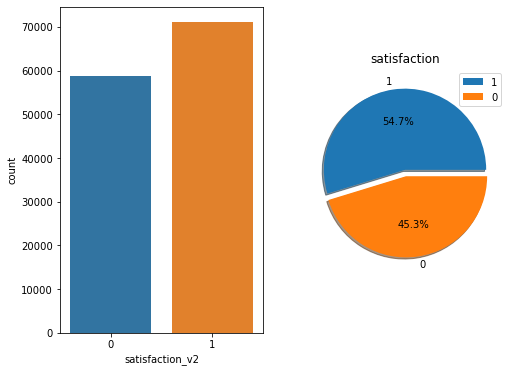

In [68]:
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
sns.countplot(x=df['satisfaction_v2'])

plt.subplot(1,2,2)
count_test=df['satisfaction_v2'].value_counts()
labels=df['satisfaction_v2'].value_counts().index
plt.pie(count_test,labels=labels,shadow=True,explode=(0,0.08),autopct='%1.1f%%')
plt.legend(labels)
plt.title('satisfaction')
plt.show()

In [69]:
df_sat=df.loc[df['satisfaction_v2']==0]
df_notsat=df.loc[df['satisfaction_v2']==1]

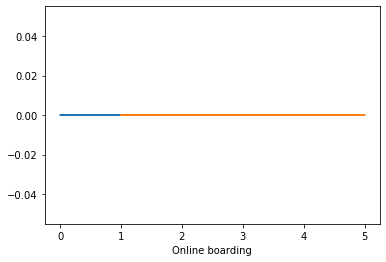

In [70]:
plt.plot(df_sat['Online boarding'],np.zeros_like(df_sat['Online boarding']))
plt.plot(df_notsat['Online boarding'],np.zeros_like(df_notsat['Online boarding']))
plt.xlabel('Online boarding')
plt.show()

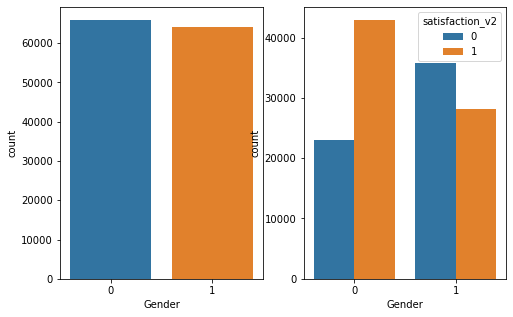

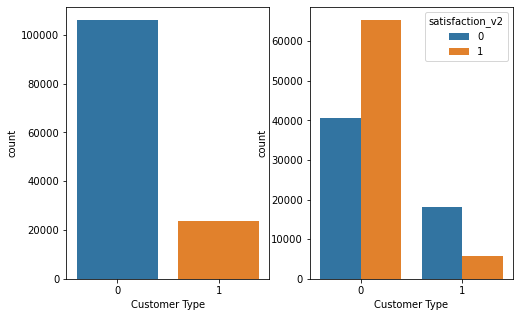

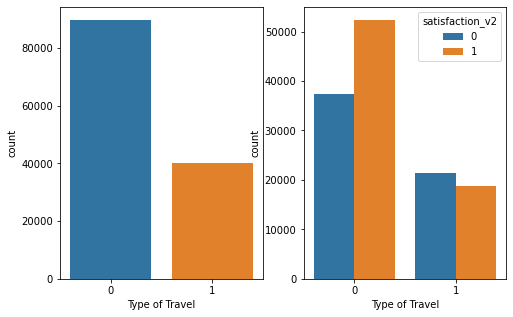

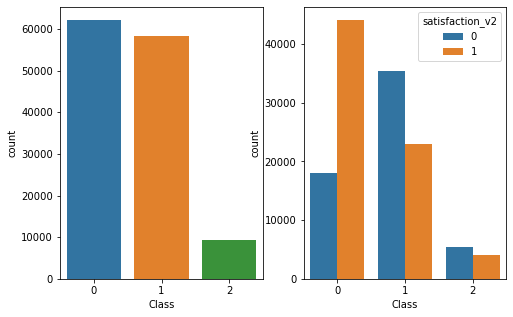

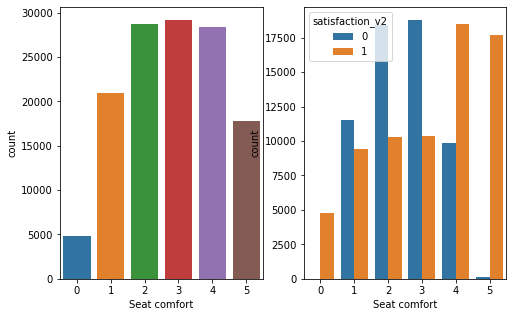

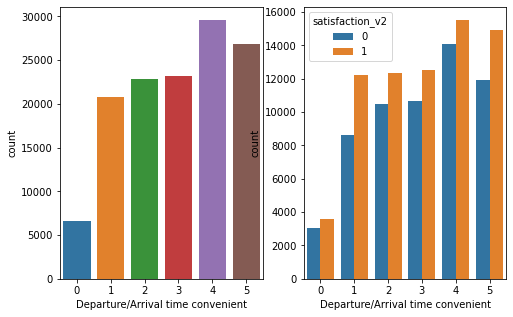

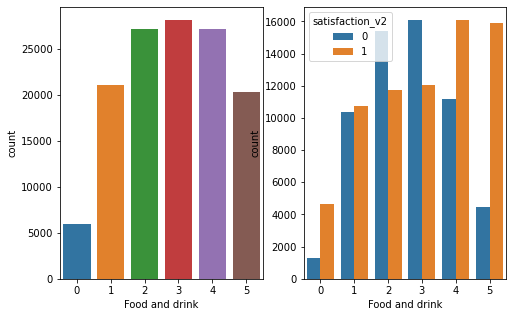

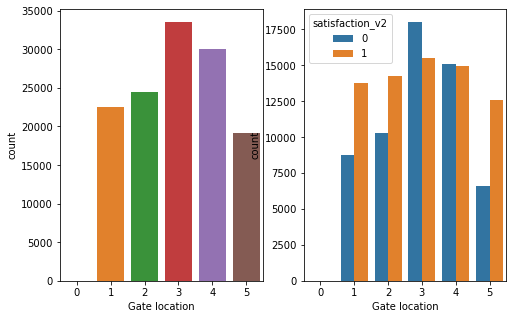

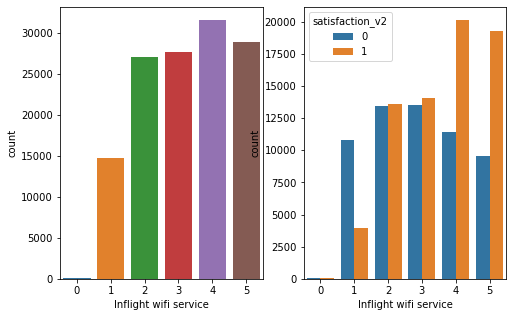

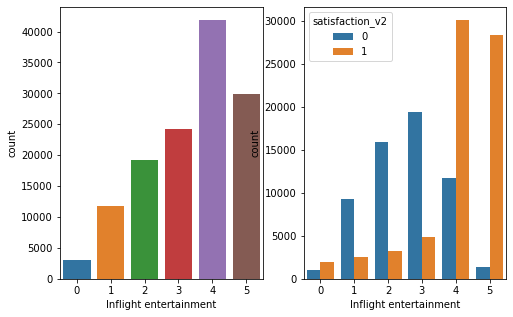

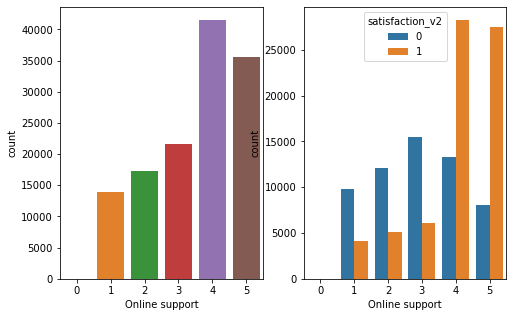

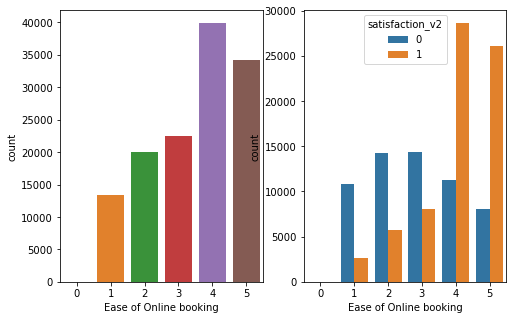

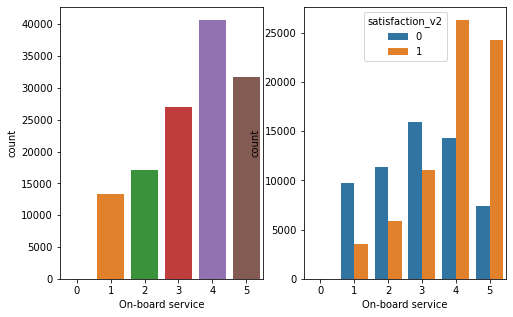

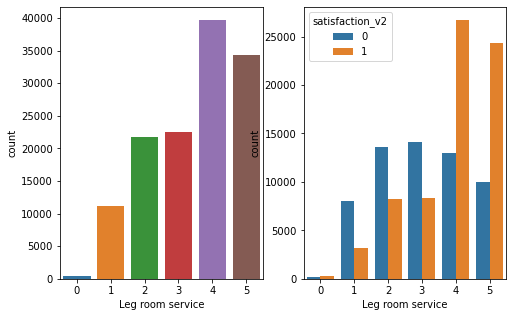

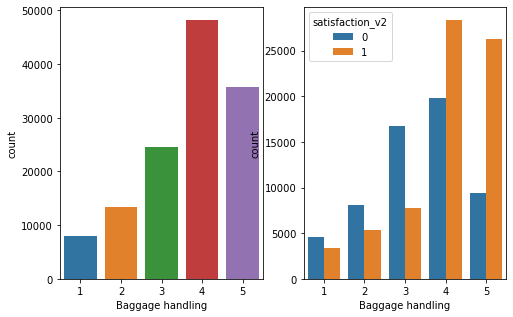

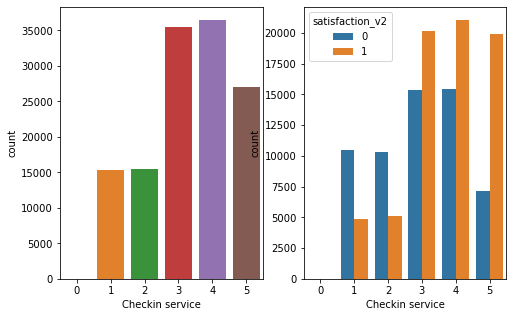

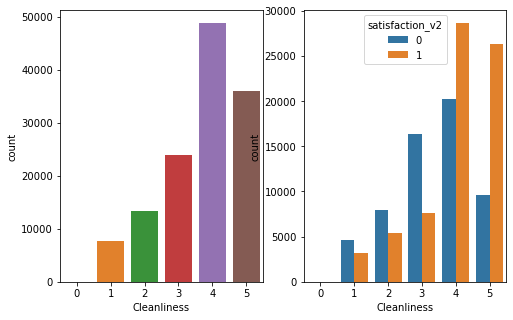

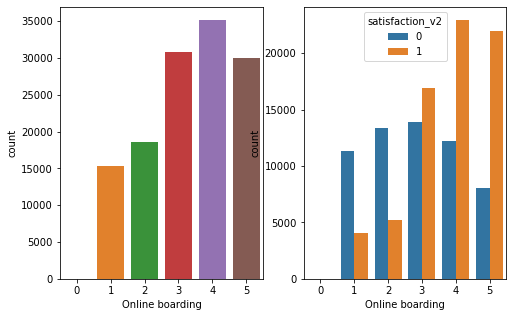

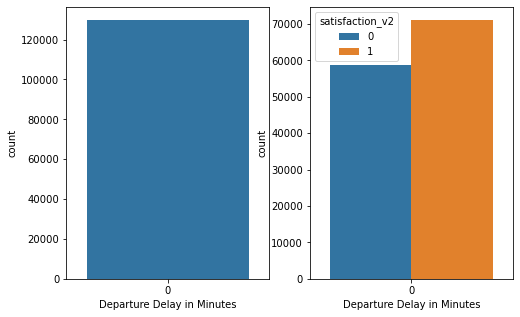

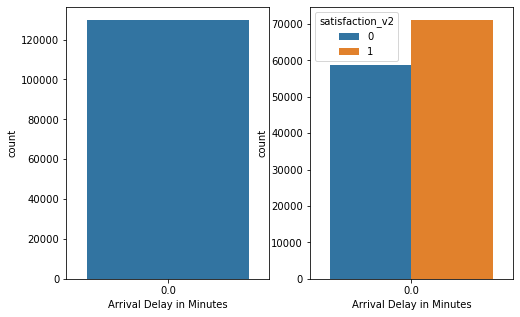

In [34]:
for i in df.columns:
    if len(df[i].unique())<=6 and i !='satisfaction_v2':
        plt.figure (figsize=(8,5))
        plt.subplot(1,2,1)
        sns.countplot(x=df[i],data=df)
        
        plt.subplot(1,2,2)
        sns.countplot(x=df[i],hue='satisfaction_v2',data=df)
        plt.show()

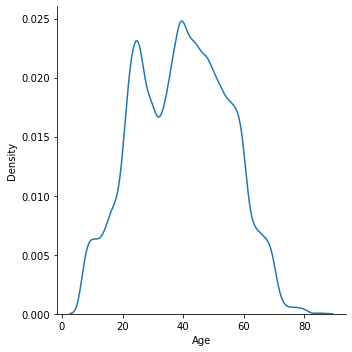

In [35]:
sns.displot(data=df,x='Age',kind='kde')

<AxesSubplot:xlabel='Flight Distance', ylabel='Count'>

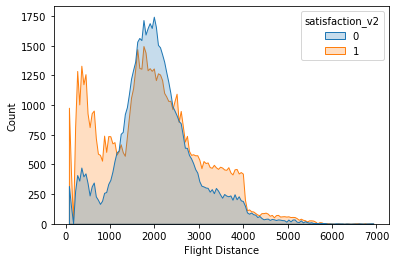

In [36]:
sns.histplot(x='Flight Distance',hue='satisfaction_v2',data=df,element='poly')

In [37]:
df.columns

Index(['id', 'satisfaction_v2', 'Gender', 'Customer Type', 'Age',
       'Type of Travel', 'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [38]:
g_data=df.groupby('Class')['Departure/Arrival time convenient','Food and drink','Gate location',
       'Inflight wifi service', 'Inflight entertainment',
       'Ease of Online booking', 'Leg room service', 'Checkin service', 'Cleanliness'].agg(['mean'])

C:\Users\DELL\AppData\Local\Temp/ipykernel_9508/3479154335.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  g_data=df.groupby('Class')['Departure/Arrival time convenient','Food and drink','Gate location',


<AxesSubplot:>

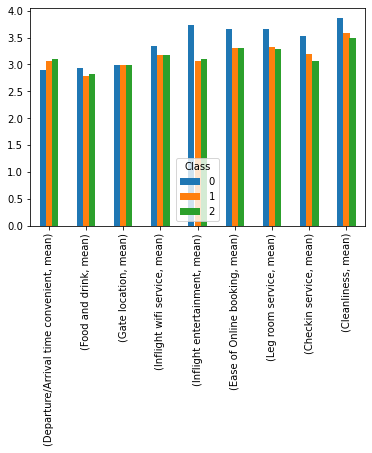

In [39]:
g_data.T.plot(kind='bar')

In [40]:
g_data1=df.groupby('Type of Travel')['Departure/Arrival time convenient','Food and drink','Gate location',
       'Inflight wifi service', 'Inflight entertainment',
       'Ease of Online booking', 'Leg room service', 'Checkin service', 'Cleanliness'].agg(['mean'])

C:\Users\DELL\AppData\Local\Temp/ipykernel_9508/499687406.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  g_data1=df.groupby('Type of Travel')['Departure/Arrival time convenient','Food and drink','Gate location',


<AxesSubplot:>

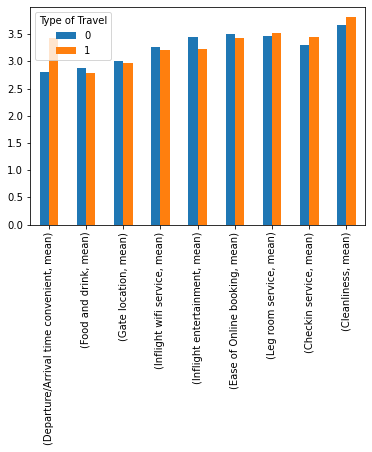

In [41]:
g_data1.T.plot(kind='bar')

In [42]:
g_data2=df.groupby('Customer Type')['Departure/Arrival time convenient','Food and drink','Gate location',
       'Inflight wifi service', 'Inflight entertainment',
       'Ease of Online booking', 'Leg room service', 'Checkin service', 'Cleanliness'].agg(['mean'])

C:\Users\DELL\AppData\Local\Temp/ipykernel_9508/4221949.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  g_data2=df.groupby('Customer Type')['Departure/Arrival time convenient','Food and drink','Gate location',


<AxesSubplot:>

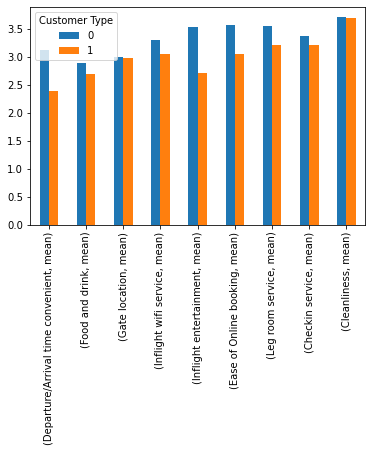

In [43]:
g_data2.T.plot(kind='bar')

In [44]:
# models

In [46]:
#k-Nearest Neighbors

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn

KNeighborsClassifier()

In [ ]:
knn.fit(x_train_scaled,y_train)

In [ ]:
def classification_task( model,x_train_scaled, y_train ,x_test_scaled ,y_test, predic,model_name):
 
    perf_df=pd.DataFrame({'Train_Score':model.score(X_train_scaled,y_train),"Test_Score":model.score(X_test_scaled,y_test),
                       "Precision_Score":precision_score(y_test,predic),"Recall_Score":recall_score(y_test,predic),
                       "F1_Score":f1_score(y_test,predic) , "accuracy":accuracy_score(y_test,predic)}, index=[model_name])
    return perf_df

In [ ]:
knn = KNeighborsClassifier()
knn

In [ ]:
knn.fit(x_train_scaled,y_train)

In [80]:
#Feature Scaling


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [ ]:
# function to validate score

In [174]:
def classification_task( model,x_train_scaled, y_train ,x_test_scaled ,y_test, predic,model_name):
 
    perf_df=pd.DataFrame({'Train_Score':model.score(x_train_scaled,y_train),"Test_Score":model.score(x_test_scaled,y_test),
                       "Precision_Score":precision_score(y_test,predic),"Recall_Score":recall_score(y_test,predic),
                       "F1_Score":f1_score(y_test,predic) , "accuracy":accuracy_score(y_test,predic)}, index=[model_name])
    return perf_df

In [175]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


In [119]:
# Models

In [120]:
#  k-Nearest Neighbors

In [186]:
knn = KNeighborsClassifier()
knn

KNeighborsClassifier()

In [187]:
knn.fit(x_train_scaled,y_train)

KNeighborsClassifier()

In [188]:
pred= knn.predict(x_test_scaled)

In [189]:
Eval_knn= classification_task(knn,x_train_scaled, y_train ,x_test_scaled ,y_test,pred,"knn" )
Eval_knn

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
knn,0.927133,0.899908,0.921241,0.894525,0.907686,0.899908


In [190]:
import time

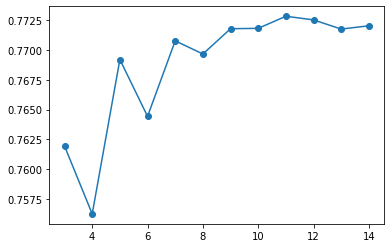

In [126]:
from sklearn.neighbors import KNeighborsClassifier
values=[]
start_time = time.time()
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    predictions=classifier.predict(x_test)
    acc=accuracy_score(y_test,predictions)
    values.append(acc)
plt.plot(neighbors,values,'o-')

In [137]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [140]:
results_arr = {'Accuracy':[],'Precision':[],'Recall':[],'F1_Score':[]}

In [141]:
classifier=KNeighborsClassifier(n_neighbors=13,metric='minkowski')
classifier.fit(x_train,y_train)
predictions=classifier.predict(x_test)
end_time = time.time()

In [144]:
accuracy1 = accuracy_score(y_test,predictions)
precision1 = precision_score(y_test,predictions)
recall1 = recall_score(y_test,predictions)
f11 = f1_score(y_test,predictions)
cm = confusion_matrix(y_test,predictions)



results_arr['Accuracy'].append(accuracy1)
results_arr['Precision'].append(precision1)
results_arr['Recall'].append(recall1)
results_arr['F1_Score'].append(f11)
results_arr['Failure%'].append(fail_percent)


print('Accuracy is',accuracy1)
print('precision is',precision1)
print('recall is',recall1)
print('f1_score is',f11)
print(cm)


Accuracy is 0.7717585463504774
precision is 0.7903862183939984
recall is 0.7962714141753443
f1_score is 0.793317901664947
[[10836  3772]
 [ 3639 14223]]


In [127]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn

KNeighborsClassifier()

In [128]:
from sklearn import metrics

In [129]:
# calculating the accuracy of models with different values of k

In [ ]:
mean_acc = np.zeros(200)
for i in range(1,57):

In [ ]:
 #Train Model and Predict  
knn = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
yhat= knn.predict(x_test)
mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)
mean_acc

In [212]:
mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)

NameError: name 'yhat' is not defined

In [213]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

NameError: name 'mean_acc' is not defined

<Figure size 720x432 with 0 Axes>

In [ ]:
# Hyperparameter Tuning(Exhaustive Grid Search technique)

In [147]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_params = { 'n_neighbors' : [5,6,7,9,10,11,13,14],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [ ]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [192]:
# Since we have provided the class validation score as 3( cv= 3), Grid Search will evaluate the model 6 x 2 x 3 x 3 = 108 times with different hyperparameters.

In [164]:
# fit the model on our train set
g_res = gs.fit(x_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


In [165]:
# find the best score
g_res.best_score_

0.8000821270916744

In [166]:
# get the hyperparameters with the best score
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}

In [167]:
# use the best hyperparameters
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform',algorithm = 'brute',metric = 'minkowski')
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='brute')

In [176]:
# get a prediction
y_hat = knn.predict(x_train)
y_knn = knn.predict(x_test)

In [177]:
#Model Evaluation

In [170]:
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_knn))

Training set accuracy:  0.8434554973821989
Test set accuracy:  0.7687711733908223


In [171]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_knn))

[[10800  3808]
 [ 3700 14162]]


In [180]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, x, y, cv =5)

In [181]:
print('Model accuracy: ',np.mean(scores))

Model accuracy:  0.7053664921465969


In [172]:
## XGB model

In [198]:
 pip install  xgboost

In [202]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [203]:
# Train XGB boost model on the scaled data
xgb = XGBClassifier()


In [204]:
# Fit the model
xgb.fit(x_train_scaled,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [206]:
#predict x_test_scaled
pred = xgb.predict(x_test_scaled)

In [208]:
#calling the score function
Eval_XGB= classification_task(xgb,x_train_scaled, y_train ,x_test_scaled ,y_test,pred,"XGB" )
Eval_XGB

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
XGB,0.933436,0.919156,0.928559,0.924141,0.926345,0.919156


In [210]:
#creating confusion matrix to know the errors
conf = confusion_matrix(y_test, pred ,normalize="all")
disp = ConfusionMatrixDisplay(conf).plot(cmap=plt.cm.PuBuGn)

NameError: name 'ConfusionMatrixDisplay' is not defined